In [1]:
from AnalysisGiessen import analyseGiessen
import pandas as pd
import numpy as np 

In [2]:
n_sample = 100
n_params = 5
file_path = "../Data/Synthetic/Posterior_sims/waveform"
file = pd.read_csv(f"{file_path}/pressure_traces_rv/all_pressure_traces_rv.csv")
file

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,CO,dt,EF,dPAP,sPAP,mPAP
0,0.900901,1.803439,3.393129,5.652203,8.475567,11.534398,14.291807,16.295872,17.366927,17.525005,...,0.684064,0.684064,0.684064,0.904782,4.129352,0.006208,0.485020,0.062545,17.567654,4.863584
1,0.881031,1.747174,3.272764,5.440745,8.224648,11.381578,14.459022,16.861199,18.261790,18.644543,...,0.671751,0.671751,0.671751,0.883283,4.052536,0.006206,0.475845,0.066639,18.649329,5.082682
2,0.893186,1.822039,3.458080,5.783022,8.679089,11.794142,14.561731,16.518237,17.488895,17.507850,...,0.668571,0.668571,0.668571,0.895409,4.096885,0.006203,0.483666,0.059263,17.611047,4.813852
3,0.896364,1.804713,3.405046,5.679470,8.561403,11.748616,14.701692,16.883819,18.055964,18.234992,...,0.678848,0.678848,0.678848,0.900778,4.105670,0.006204,0.482675,0.062986,18.279076,4.971557
4,0.871410,1.714661,3.200298,5.311714,8.022228,11.094504,14.092578,16.446312,17.843569,18.266002,...,0.666093,0.666093,0.666093,0.871324,4.035863,0.006196,0.473246,0.067550,18.266054,5.028628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.894338,1.786372,3.357962,5.591536,8.409260,11.507028,14.356345,16.461198,17.604774,17.798213,...,0.681314,0.681314,0.681314,0.899373,4.124413,0.006203,0.484321,0.060741,17.834593,4.861005
96,0.880313,1.748607,3.278365,5.452485,8.199871,11.230156,14.033266,16.122577,17.285315,17.535541,...,0.669029,0.669029,0.669029,0.880384,4.061283,0.006213,0.478345,0.064163,17.553834,4.880169
97,0.888239,1.757876,3.290000,5.467484,8.188898,11.142788,13.821047,15.795248,16.891311,17.122961,...,0.677772,0.677772,0.677772,0.889709,4.103526,0.006202,0.481891,0.063673,17.141584,4.805516
98,0.904528,1.815398,3.369785,5.550314,8.310550,11.379480,14.264562,16.425346,17.613723,17.856721,...,0.643357,0.643357,0.643357,0.903938,3.919409,0.006206,0.468267,0.065180,17.877488,4.998861


In [3]:
# Repeat the first pressure trace 5 times
df = file.iloc[[0], :100].T
df_repeated = pd.concat([df] * 6, axis=0, ignore_index=True)
df_repeated.columns = ["Pressure"]
df_repeated["cPressure"] = df_repeated['Pressure']
df_repeated["dt"] = file.loc[[0], 'dt'].values[0]
df_repeated

,Pressure,cPressure,dt
0,0.900901,0.900901,0.006208
1,1.803439,1.803439,0.006208
2,3.393129,3.393129,0.006208
3,5.652203,5.652203,0.006208
4,8.475567,8.475567,0.006208
...,...,...,...
595,0.684064,0.684064,0.006208
596,0.684064,0.684064,0.006208
597,0.684064,0.684064,0.006208
598,0.684064,0.684064,0.006208


In [4]:
ag = analyseGiessen(df=df_repeated, t_resolution=df_repeated['dt'].values[0])

In [5]:
ag.df

,Pressure,cPressure,dt
0,0.900901,0.900901,0.006208
1,1.803439,1.803439,0.006208
2,3.393129,3.393129,0.006208
3,5.652203,5.652203,0.006208
4,8.475567,8.475567,0.006208
...,...,...,...
595,0.684064,0.684064,0.006208
596,0.684064,0.684064,0.006208
597,0.684064,0.684064,0.006208
598,0.684064,0.684064,0.006208


In [6]:
ag.compute_derivatives(use_filter=False)

In [7]:
ag.compute_points_of_interest(height=100, use_filter=False)

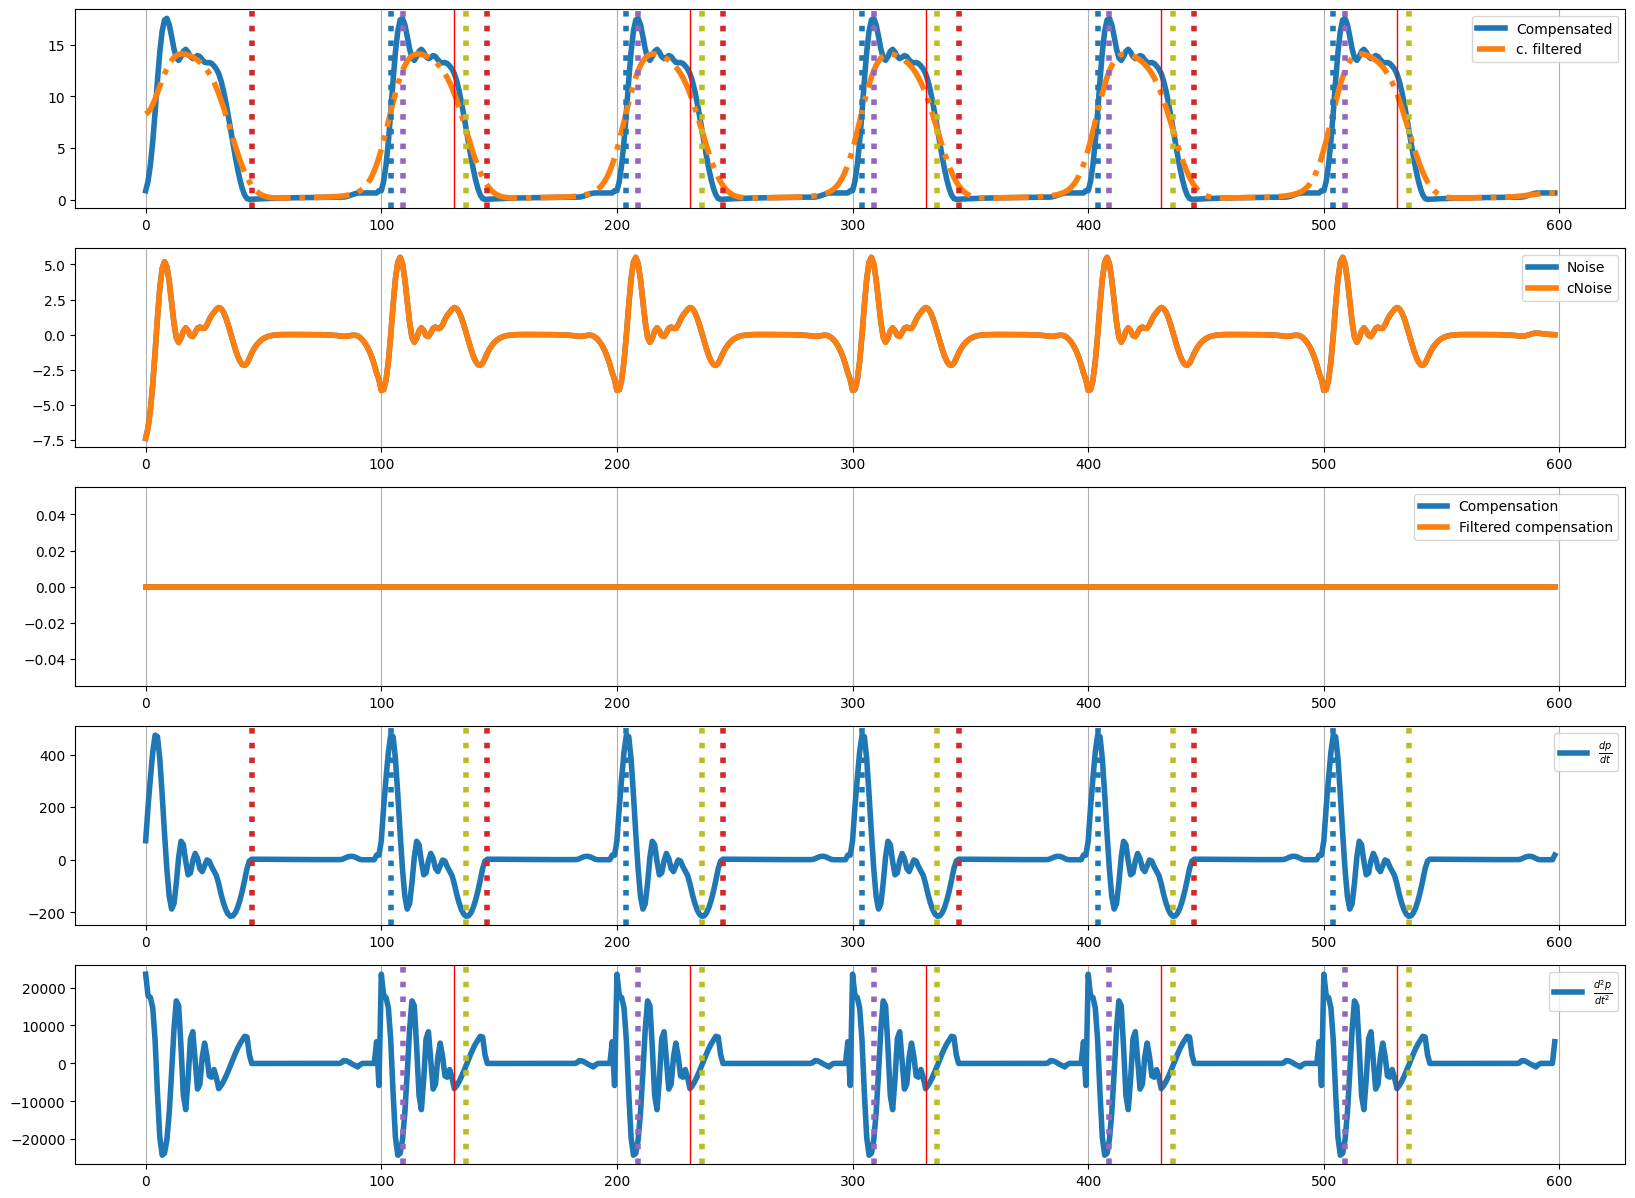

In [8]:
ag.plot_pressures()

In [9]:
beats = pd.DataFrame(ag.resample_heart_beat())
sumstats = ag.points_df

In [10]:
pd.concat([beats, sumstats.iloc[:-1,:]], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,1.397323,1.101711,0.862523,0.673577,0.528039,0.418916,0.339477,0.283557,0.245748,0.221489,...,7.674449,26.193382,12.186707,17.525005,0.534741,0.078378,0.015793,1.14934,0.000000,0.000000
1,1.397323,1.101711,0.862523,0.673577,0.528039,0.418916,0.339477,0.283557,0.245748,0.221489,...,7.674449,26.193382,12.186707,17.525005,0.534741,0.078378,0.015793,1.14934,0.620786,96.651648
2,1.397323,1.101711,0.862523,0.673577,0.528039,0.418916,0.339477,0.283557,0.245748,0.221489,...,7.674449,26.193382,12.186707,17.525005,0.534741,0.078378,0.015793,1.14934,0.620786,96.651648
3,1.397323,1.101711,0.862523,0.673577,0.528039,0.418916,0.339477,0.283557,0.245748,0.221489,...,7.674449,26.193382,12.186707,17.525005,0.534741,0.078378,0.015793,1.14934,0.620786,96.651648


### Do the above for all pressure traces

In [11]:
file

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,CO,dt,EF,dPAP,sPAP,mPAP
0,0.900901,1.803439,3.393129,5.652203,8.475567,11.534398,14.291807,16.295872,17.366927,17.525005,...,0.684064,0.684064,0.684064,0.904782,4.129352,0.006208,0.485020,0.062545,17.567654,4.863584
1,0.881031,1.747174,3.272764,5.440745,8.224648,11.381578,14.459022,16.861199,18.261790,18.644543,...,0.671751,0.671751,0.671751,0.883283,4.052536,0.006206,0.475845,0.066639,18.649329,5.082682
2,0.893186,1.822039,3.458080,5.783022,8.679089,11.794142,14.561731,16.518237,17.488895,17.507850,...,0.668571,0.668571,0.668571,0.895409,4.096885,0.006203,0.483666,0.059263,17.611047,4.813852
3,0.896364,1.804713,3.405046,5.679470,8.561403,11.748616,14.701692,16.883819,18.055964,18.234992,...,0.678848,0.678848,0.678848,0.900778,4.105670,0.006204,0.482675,0.062986,18.279076,4.971557
4,0.871410,1.714661,3.200298,5.311714,8.022228,11.094504,14.092578,16.446312,17.843569,18.266002,...,0.666093,0.666093,0.666093,0.871324,4.035863,0.006196,0.473246,0.067550,18.266054,5.028628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.894338,1.786372,3.357962,5.591536,8.409260,11.507028,14.356345,16.461198,17.604774,17.798213,...,0.681314,0.681314,0.681314,0.899373,4.124413,0.006203,0.484321,0.060741,17.834593,4.861005
96,0.880313,1.748607,3.278365,5.452485,8.199871,11.230156,14.033266,16.122577,17.285315,17.535541,...,0.669029,0.669029,0.669029,0.880384,4.061283,0.006213,0.478345,0.064163,17.553834,4.880169
97,0.888239,1.757876,3.290000,5.467484,8.188898,11.142788,13.821047,15.795248,16.891311,17.122961,...,0.677772,0.677772,0.677772,0.889709,4.103526,0.006202,0.481891,0.063673,17.141584,4.805516
98,0.904528,1.815398,3.369785,5.550314,8.310550,11.379480,14.264562,16.425346,17.613723,17.856721,...,0.643357,0.643357,0.643357,0.903938,3.919409,0.006206,0.468267,0.065180,17.877488,4.998861


In [12]:
all_pressure_traces = pd.DataFrame()
for ind in range(len(file)):
    dt = file.loc[ind, 'dt']
    f= file.iloc[[ind], :100].T
    f_repeated = pd.concat([f] * 5, axis=0, ignore_index=True)
    f_repeated.columns = ["Pressure"]
    f_repeated["cPressure"] = f_repeated['Pressure']
    f_repeated

    ag = analyseGiessen(df=f_repeated, t_resolution=dt)

    ag.compute_derivatives(use_filter=False)

    ag.compute_points_of_interest(height=100, use_filter=False)

    beats = pd.DataFrame(ag.resample_heart_beat())
    sumstats = ag.points_df

    resampled_df = pd.concat([beats, sumstats.iloc[:-1,:]], axis=1)
    all_pressure_traces = pd.concat([all_pressure_traces, resampled_df.iloc[[2]]], axis=0)
    all_pressure_traces.reset_index(drop=True, inplace=True)
    


all_pressure_traces.to_csv(f"{file_path}/resampled_all_pressure_traces_rv.csv")
#all_pressure_traces.to_csv("/Users/pmzff/Documents/GitHub/ModularCircFF/Max_param_Emulator/Outputs/Output_200/resampled_all_pressure_traces_rv")
all_pressure_traces.to_csv(f"{file_path}/resampled_all_pressure_traces_rv.csv", index=False)
all_pressure_traces

,0,1,2,3,4,5,6,7,8,9,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,1.397323,1.101711,0.862523,0.673577,0.528039,0.418916,0.339477,0.283557,0.245748,0.221489,...,7.674449,26.193382,12.186707,17.525005,0.534741,0.078378,0.015793,1.149340,0.620786,96.651648
1,1.490166,1.173651,0.917316,0.714596,0.558217,0.440729,0.354954,0.294315,0.253041,0.226265,...,9.365444,28.212745,13.029323,18.644543,0.538176,0.082069,0.015795,1.165327,0.620591,96.681984
2,1.373658,1.082613,0.847128,0.661115,0.517842,0.410424,0.332231,0.277194,0.239989,0.216123,...,7.722175,26.118931,11.996955,17.507850,0.540680,0.074924,0.015781,1.177130,0.620342,96.720844
3,1.435233,1.130835,0.884446,0.689725,0.539650,0.427038,0.344968,0.287102,0.247878,0.222605,...,9.410538,27.576035,12.538970,18.234992,0.545295,0.078528,0.015789,1.199227,0.620414,96.709566
4,1.480009,1.165891,0.911485,0.710277,0.555050,0.438414,0.353247,0.293022,0.252014,0.225391,...,9.194547,27.814562,12.929803,18.266002,0.535143,0.082687,0.015774,1.151198,0.619632,96.831671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.398319,1.102095,0.862394,0.673034,0.527170,0.417801,0.338181,0.282134,0.244239,0.219926,...,9.197028,26.853640,12.211250,17.798213,0.545267,0.076422,0.015783,1.199090,0.620284,96.729835
96,1.417035,1.116875,0.873913,0.681891,0.533883,0.422806,0.341835,0.284721,0.245982,0.220991,...,9.102521,26.863458,12.364334,17.535541,0.539734,0.079503,0.015812,1.172657,0.621313,96.569681
97,1.387223,1.094017,0.856764,0.669335,0.524951,0.416678,0.337842,0.282328,0.244774,0.220656,...,7.503525,25.738339,12.086306,17.122961,0.530416,0.079174,0.015782,1.129546,0.620236,96.737434
98,1.438070,1.131029,0.882910,0.687115,0.536405,0.423422,0.341114,0.283048,0.243608,0.218071,...,9.252846,27.683414,12.820619,17.856721,0.536884,0.081146,0.015467,1.159288,0.620553,96.687903
